# A Python Regularized Logistic Regression Tutorial

Regressão Logística é um modelo de regressão que relaciona *reponse variable* com um conjunto de *explanatory variables*, representando a probabilidade de ocorrência de uma *response variable* em termos de uma função de *explanatory variables*.

"regularization can address overfitting or underfitting."

** Optimization and cross validation:** [Add basic information]

**Explanatory variables:** são variáveis parcialmente independentes no estudos sobre a ocorrência de um determinado evento, ou seja, a associação entre as varáveis apoiam ou fornecem uma explicação para a ocorrência de um evento.

## Importing

In [144]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

## Loading data

In [145]:
data = np.genfromtxt('ex2data2.txt', delimiter=',')

accepted = data[(data[:,2]==1)]
rejected = data[(data[:,2]==0)]

theta = np.array([0., 0., 0.])

## Data Visualization

Para o conjunto de dados em estudo, é possível criar um gráfico para visualizar seus pontos.

A imagem abaixo nos permite entender a distribuição dos resultados dos testes em relação aos microchips que foram aprovados e rejeitados.

A partir do resultado obtido, é possível observar que os dados não possuem uma distribuição linearmente separável.

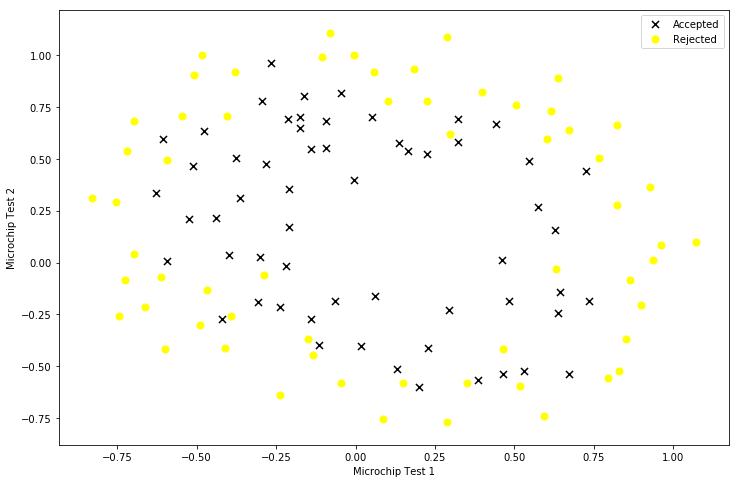

In [146]:
plt.close('all')

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(accepted[:, 0], accepted[:,1], s=50, c='black', marker='x', label='Accepted')  
ax.scatter(rejected[:, 0], rejected[:,1], s=50, c='yellow', marker='o', label='Rejected')  

ax.legend()  
ax.set_xlabel('Microchip Test 1')  
ax.set_ylabel('Microchip Test 2')

plt.show()

## Feature mapping

Uma vez que a Regresão Logística não é um método sofisticado para trabalhar com problemas não-lineares, é necessário criar novas *features* a partir das existentes de modo que seja possível especular a melhor fronteira de decisão obtida a partir das associações entre as duas *features* originais.

In [166]:
"""
    This function returns a new feature array given two features and a degree
    x1 and x2 must be arrays with same size
"""
def map_feature(x1, x2, degree=6):
    map_feature_size = x1.size
    map_feature = np.ones(shape=(map_feature_size, 1))
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            """ Append values to the end of an array """
            column = (x1 ** (i - j)) * (x2 ** j)
            map_feature = np.append(map_feature, column, axis=1)
        
    return map_feature

In [167]:
x = data[:, :2]

x1 = x[:, [0]]
x2 = x[:, [1]]

maped = map_feature(x1, x2)
print(maped.shape)

(118, 28)


### Cost function

In [168]:
def sigmoid_function(z):  
    return 1 / (1 + np.exp(-z))

In [169]:
def cost_function(theta, x, y, pLambda = 1.):  
    
    m = len(x)
    zero = 0.000001
    
    ''' Construct the hypothesis and avoid absolute zeros '''
    param = (x.dot(theta))
    hyphotesis = sigmoid_function(param)
    hyphotesis[hyphotesis == 0] = zero
    
    ''' Also, compute the interval and avoid absolute zeros '''
    interval = 1 - hyphotesis
    interval[interval == 0] = zero
    
    y1 = y * np.log(hyphotesis)
    y0 = (1 - y) * np.log(interval)
    y2 = theta**2
    
    cost     = ((-1./m) * np.sum(y1 + y0)) + ((pLambda/(2*m)) * np.sum(y2))
    
    return cost

Podemos testar a Função de Custo para um conjunto theta de zeros

In [171]:
""" 
    We already have the mapped features : maped 
    So, we can use it as X input
    
    We need to input an array of thetas with the same shape of
    the mapped array
"""
theta = np.zeros(maped.shape[1])
y = data[:, 2]

print('Theta shape must be: 28 columns and 1 row')
print(theta.shape)

cost = cost_function(theta, maped, y, pLambda = 1.)
print('Cost function output: ')
print(cost)

Theta shape must be: 28 columns and 1 row
(28,)
Cost function output: 
0.69314718056


### Gradient Descent

In [205]:
def gradient_descent(x, y, theta, pLambda, tolerance, log=False):
    m = y.size
    episilon = 0.000001
    zero     = 0.000001
    residual = np.ones(tolerance)
    J        = np.zeros(tolerance)
    interact = 0
    converge = False
    
    while not converge:
        
        ' Start adjusting theta values '
        hypothesis = sigmoid_function(x.dot(theta))
        error = hypothesis - y
        
        error[error == 0] = zero
        
        gradient = ((1./m) * (x.T.dot(error))) + ((pLambda/(2*m)) * theta)
        
        tmpTheta = theta
        theta = theta - gradient
        
        ' Run the cost function over the data with new theta '
        J[interact] = cost_function(theta, x, y, pLambda)
        
        step = abs(np.linalg.norm(theta) - np.linalg.norm(tmpTheta))        
        converge = (step <= episilon)
        
        residual[interact] = step
        
        if interact % 100 == 0 and log:
            ' The main idea here is to minimize the error value when evaluating the hypothesis '
            print('Interaction ' + str(interact) + ', Redidual error output :' + str(J[interact]) + ', Step size: ' + str(step))
        
        if (interact + 1) == tolerance:
            print('Caution! The routine has reached the maximum tolerance! Results may not converge.')
            converge = True
            
        interact = interact + 1
    
    '''
        For j = 0 whe do not sum the last term
    '''
    gradient[0] = gradient[0] - ((pLambda/(2*m)) * theta)[0]
        
    return theta, J, interact, residual, gradient

In [206]:
op_theta, cost, it, r, grad = gradient_descent(maped, y, theta, 1, 6000)
print('Initial cost')
print(cost[0])

print('Initial Gradient')
print(grad)

Initial cost
0.681291555143
Initial Gradient
[ -6.67793403e-03   8.12568222e-08  -4.50150933e-07  -6.29245583e-10
   1.81721521e-06   1.05118342e-06  -1.26892769e-07  -1.56963099e-07
  -1.36211579e-06   1.08716302e-06   8.76760059e-09  -2.27969878e-06
   3.90515046e-07   1.81771148e-07   4.96013112e-07   5.86466148e-07
  -5.10433444e-07  -1.85348382e-06   7.75806602e-07   3.01099494e-07
  -1.09336175e-06   1.91240406e-07  -1.43593393e-06  -5.01865646e-08
  -1.39789288e-06   6.72384371e-07   3.39052775e-07  -1.45569672e-06]


### Plotting the decision boundary

In [214]:
guess = np.zeros(maped.shape[1])
(opt_theta, j, i, r, g) = gradient_descent(maped, y, guess, 1, 6000)

print('Iteraction reached : ' + str(i))
print('Theta : ' + str(t))

Iteraction reached : 1431
Theta : [  1.57594335e+00   9.41108656e-01   1.64783497e+00  -2.54344693e+00
  -1.48129427e+00  -1.93038291e+00   2.76214380e-01  -5.72993528e-01
  -4.90126247e-01  -1.92257234e-01  -1.94876842e+00  -1.28330669e-02
  -8.94156964e-01  -4.62955039e-01  -1.60809239e+00  -3.02802028e-01
  -2.97340035e-01   1.25051476e-03  -4.40004019e-01  -4.71466655e-01
  -4.92123091e-01  -1.43159326e+00   8.73209029e-02  -4.19777123e-01
   5.77308801e-02  -4.93557856e-01  -2.66040224e-01  -1.15397517e+00]


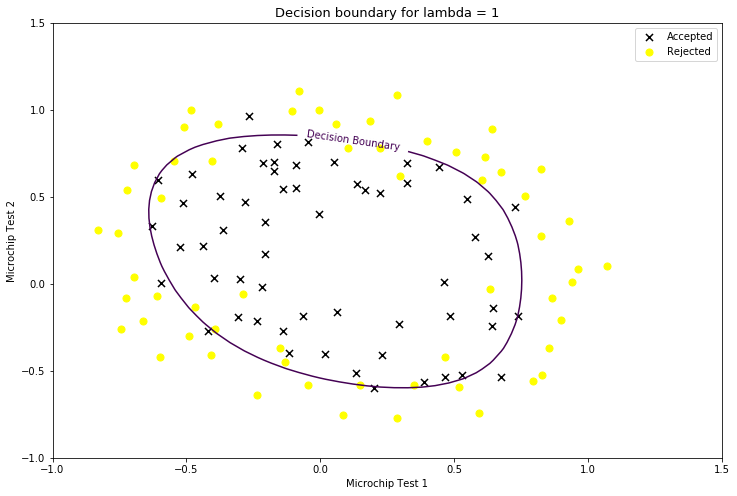

In [238]:
accepted = data[(data[:,2]==1)]
rejected = data[(data[:,2]==0)]
    
plt.close('all')

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(accepted[:, 0], accepted[:,1], s=50, c='black', marker='x', label='Accepted')  
ax.scatter(rejected[:, 0], rejected[:,1], s=50, c='yellow', marker='o', label='Rejected')  
    
''' contour '''
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
    
for i in range(len(u)):
    for j in range(len(v)):
        a = np.array([[u[i]]])
        b = np.array([[v[j]]])
        maped = map_feature(a, b)
            
        z[i, j] = maped.dot(opt_theta)[0]
    
cs = plt.contour(u, v, z.T, [0], label="Boundary")
plt.clabel(cs, inline=1, fontsize=10, fmt='Decision Boundary')

plt.title('Decision boundary for lambda = ' + str(1), fontsize=13)

''' legend '''
ax.legend()  
ax.set_xlabel('Microchip Test 1')  
ax.set_ylabel('Microchip Test 2')

plt.show()

## Regularized Linear Regression and Bias vs. Variance

O conjunto de dados do exemplo está no formato.mat, devemos carregar os dados com auxílio de bibliotecas externas.

In [241]:
import scipy
import scipy.io as spio

mat = scipy.io.loadmat('ex5data1.mat')

'''
    Load matrix data using X and y labels as recommended by the
    exercise
'''

x = mat["X"]
y = mat["y"]

m = x.shape[0]

print(m)

12


### Visualizing Data

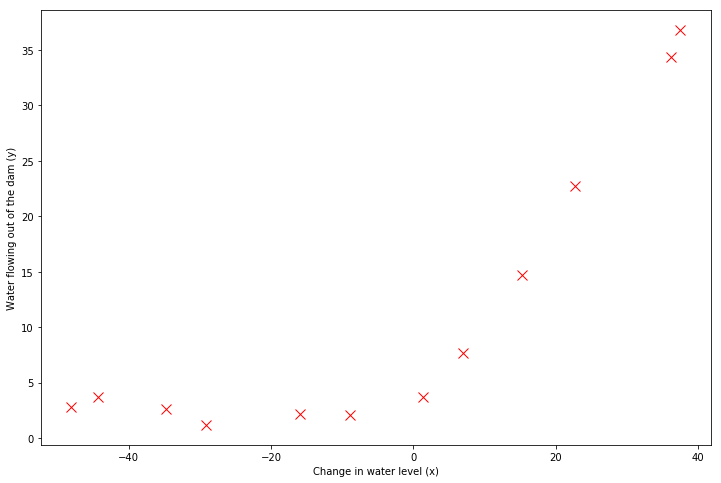

In [244]:
plt.close('all')

plt.subplots(figsize=(12,8)) 

plt.plot(x, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

plt.show(block=False) 

### Regularized Linear Regression Cost

In [311]:
def cost_function(x, y, theta, pLambda=1.):
    m = y.size
    
    regression = x.dot(theta)
    
    regressionError =  np.sum((regression - y)**2)
    regularizedTerm =  np.sum(theta**2)
    
    cost = ((1./(2*m)) * regressionError) + ((pLambda/(2*m)) * regularizedTerm)   
    
    return cost - ((pLambda/(2*m)) * (theta**2)[0])

In [312]:
x = mat["X"]
y = mat["y"]

x = x[:, [0]]
y = y[:, 0]

x = np.insert(x, 0, np.ones(x.shape[0]), axis=1)

theta = np.ones(shape=(x.shape[1]))

print(cost_function(x, y, theta))

303.99319222


In [224]:
'''
    Parameters to input for fmin_bfgs
        f(x, *args) : is our cost function
        x0: is our initial guess (theta of zeros)
        fPrime: is our gradient of f
        args: extra parameters for f and fPrime
'''

x = data[:, :2]
x1 = x[:, [0]]
x2 = x[:, [1]]
X = map_feature(x1, x2)
print('Shape of maped X: ', X.shape)


print('Shape of guess: ', guess.shape)

y = data[:, 2]
print('Shape of y: ', y.shape)

extraArgs = (X, y)

'''
    optimize.fmin_bfgs(cost_function, guess, args=extraArgs, fprime=gradient_descent, maxiter=400)
'''

Shape of maped X:  (118, 28)
Shape of guess:  (28,)
Shape of y:  (118,)


'\n    optimize.fmin_bfgs(cost_function, guess, args=extraArgs, fprime=gradient_descent, maxiter=400)\n'